# Problem Statement

PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
ff = pd.read_csv('forestfires.csv')
ff.head(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
ff.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [4]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
ff.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
ff.shape

(517, 31)

In [7]:
ff = ff.drop(["month", "day"], axis = 1)
ff.head(5)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [8]:
le = LabelEncoder()

ff["size_category"] = le.fit_transform(ff["size_category"])
ff.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [9]:
ff.size_category.value_counts()

size_category
1    378
0    139
Name: count, dtype: int64

<Axes: xlabel='size_category', ylabel='Density'>

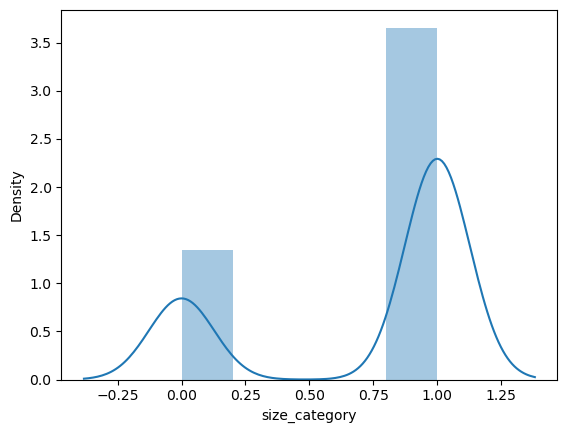

In [10]:
sns.distplot(ff.size_category)

# Model Building

In [11]:
x = ff.iloc[:,:-1]
y = ff['size_category']

In [12]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [14]:
sc = StandardScaler()
x = sc.fit_transform(x)
x 

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [16]:
#Initialize ann model
ann = Sequential()

#Add hidden layers
ann.add(Dense(units=6, activation='relu'))

#Add output layer
ann.add(Dense(units=1,activation='sigmoid'))

#Establish the connection between layers
ann.compile(optimizer='adam',loss='binary_crossentropy')

#Fit the data 
ann.fit(xtrain,ytrain,epochs=50)



Epoch 1/50

13/13 [==============================] - 2s 7ms/step - loss: 1.0249
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.9704
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.9243
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 0.8801
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 0.8420
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 0.8071
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 0.7761
Epoch 8/50
13/13 [==============================] - 0s 4ms/step - loss: 0.7486
Epoch 9/50
13/13 [==============================] - 0s 4ms/step - loss: 0.7235
Epoch 10/50
13/13 [==============================] - 0s 4ms/step - loss: 0.7011
Epoch 11/50
13/13 [==============================] - 0s 3ms/step - loss: 0.6821
Epoch 12/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6642
Epoch 13/50
13/13 [===========================

In [17]:
ypred = ann.predict(xtest)
ypred = ypred > 0.5
ypred

4/4 [==============================] - 0s 4ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [18]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.64      0.24      0.35        29
           1       0.76      0.95      0.85        75

    accuracy                           0.75       104
   macro avg       0.70      0.59      0.60       104
weighted avg       0.73      0.75      0.71       104



In [19]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=25, activation='relu'))

ann.add(Dense(units=1, activation='tanh'))

ann.compile(optimizer='adam', loss='binary_crossentropy')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs=60)

Epoch 1/60
13/13 [==============================] - 3s 49ms/step - loss: 2.3110 - val_loss: 1.0596
Epoch 2/60
13/13 [==============================] - 0s 13ms/step - loss: 0.7629 - val_loss: 0.8380
Epoch 3/60
13/13 [==============================] - 0s 12ms/step - loss: 0.6604 - val_loss: 0.8228
Epoch 4/60
13/13 [==============================] - 0s 13ms/step - loss: 0.6286 - val_loss: 0.8042
Epoch 5/60
13/13 [==============================] - 0s 12ms/step - loss: 0.6030 - val_loss: 0.7856
Epoch 6/60
13/13 [==============================] - 0s 12ms/step - loss: 0.5789 - val_loss: 0.7737
Epoch 7/60
13/13 [==============================] - 0s 13ms/step - loss: 0.5662 - val_loss: 0.7563
Epoch 8/60
13/13 [==============================] - 0s 13ms/step - loss: 0.5501 - val_loss: 0.7480
Epoch 9/60
13/13 [==============================] - 0s 12ms/step - loss: 0.5385 - val_loss: 0.7344
Epoch 10/60
13/13 [==============================] - 0s 13ms/step - loss: 0.5266 - val_loss: 0.7266
Epoch 11/

<Axes: >

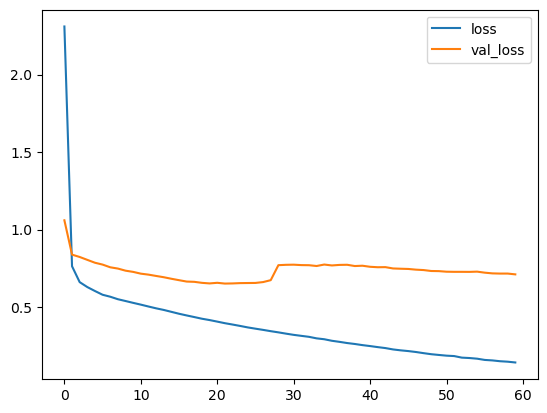

In [20]:
val_loss = pd.DataFrame(ann.history.history)

val_loss.plot()

# Early Stopping

In [21]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [23]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dense(units=1, activation='tanh'))
ann.compile(optimizer='adam', loss = 'binary_crossentropy')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), callbacks=[early], epochs=100) 

Epoch 1/100
13/13 [==============================] - 3s 44ms/step - loss: 4.4287 - val_loss: 3.2029
Epoch 2/100
13/13 [==============================] - 0s 11ms/step - loss: 1.7455 - val_loss: 1.4254
Epoch 3/100
13/13 [==============================] - 0s 12ms/step - loss: 0.9929 - val_loss: 0.7867
Epoch 4/100
13/13 [==============================] - 0s 14ms/step - loss: 0.7259 - val_loss: 0.7200
Epoch 5/100
13/13 [==============================] - 0s 13ms/step - loss: 0.6684 - val_loss: 0.6925
Epoch 6/100
13/13 [==============================] - 0s 12ms/step - loss: 0.6376 - val_loss: 0.6743
Epoch 7/100
13/13 [==============================] - 0s 11ms/step - loss: 0.6106 - val_loss: 0.6587
Epoch 8/100
13/13 [==============================] - 0s 13ms/step - loss: 0.5866 - val_loss: 0.6457
Epoch 9/100
13/13 [==============================] - 0s 10ms/step - loss: 0.5672 - val_loss: 0.6366
Epoch 10/100
13/13 [==============================] - 0s 12ms/step - loss: 0.5531 - val_loss: 0.6310

<Axes: >

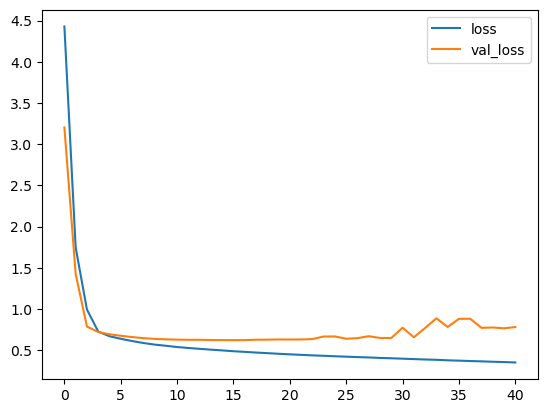

In [24]:
early_loss = pd.DataFrame(ann.history.history)

early_loss.plot()

# Drop Out Layer

In [25]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=1, activation='tanh'))
ann.compile(optimizer='adam',loss='binary_crossentropy')
ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs = 100)

Epoch 1/100
13/13 [==============================] - 3s 47ms/step - loss: 6.4559 - val_loss: 4.7890
Epoch 2/100
13/13 [==============================] - 0s 11ms/step - loss: 5.2950 - val_loss: 3.2170
Epoch 3/100
13/13 [==============================] - 0s 14ms/step - loss: 4.7042 - val_loss: 2.5292
Epoch 4/100
13/13 [==============================] - 0s 13ms/step - loss: 4.2044 - val_loss: 2.1541
Epoch 5/100
13/13 [==============================] - 0s 12ms/step - loss: 4.3434 - val_loss: 1.8547
Epoch 6/100
13/13 [==============================] - 0s 14ms/step - loss: 3.4404 - val_loss: 1.2861
Epoch 7/100
13/13 [==============================] - 0s 13ms/step - loss: 2.8953 - val_loss: 0.8550
Epoch 8/100
13/13 [==============================] - 0s 12ms/step - loss: 2.8232 - val_loss: 0.8149
Epoch 9/100
13/13 [==============================] - 0s 12ms/step - loss: 2.6271 - val_loss: 0.7971
Epoch 10/100
13/13 [==============================] - 0s 13ms/step - loss: 2.2290 - val_loss: 0.7901

<Axes: >

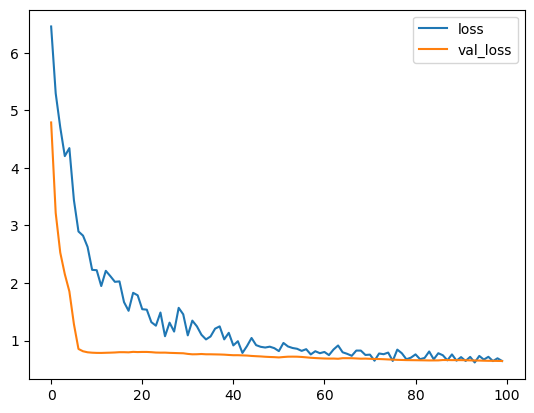

In [26]:
drop_loss = pd.DataFrame(ann.history.history)
drop_loss.plot()

# Early Stopping + Drop Out Layer

In [27]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=1, activation='tanh'))
ann.compile(optimizer='adam',loss='binary_crossentropy')
ann.fit(xtrain,ytrain, validation_data=(xtest,ytest),callbacks=[early], epochs = 100)

Epoch 1/100
13/13 [==============================] - 3s 45ms/step - loss: 5.9227 - val_loss: 5.8693
Epoch 2/100
13/13 [==============================] - 0s 11ms/step - loss: 5.1415 - val_loss: 4.5738
Epoch 3/100
13/13 [==============================] - 0s 13ms/step - loss: 4.4988 - val_loss: 3.4767
Epoch 4/100
13/13 [==============================] - 0s 12ms/step - loss: 3.9102 - val_loss: 1.9892
Epoch 5/100
13/13 [==============================] - 0s 14ms/step - loss: 3.6104 - val_loss: 1.4627
Epoch 6/100
13/13 [==============================] - 0s 13ms/step - loss: 3.2070 - val_loss: 1.1194
Epoch 7/100
13/13 [==============================] - 0s 13ms/step - loss: 3.0308 - val_loss: 1.0730
Epoch 8/100
13/13 [==============================] - 0s 12ms/step - loss: 3.0291 - val_loss: 1.0382
Epoch 9/100
13/13 [==============================] - 0s 12ms/step - loss: 2.6750 - val_loss: 1.0139
Epoch 10/100
13/13 [==============================] - 0s 15ms/step - loss: 2.3268 - val_loss: 0.9987

<Axes: >

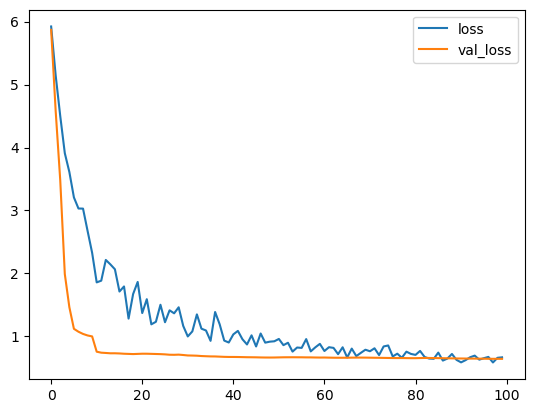

In [28]:
de_loss = pd.DataFrame(ann.history.history)
de_loss.plot()

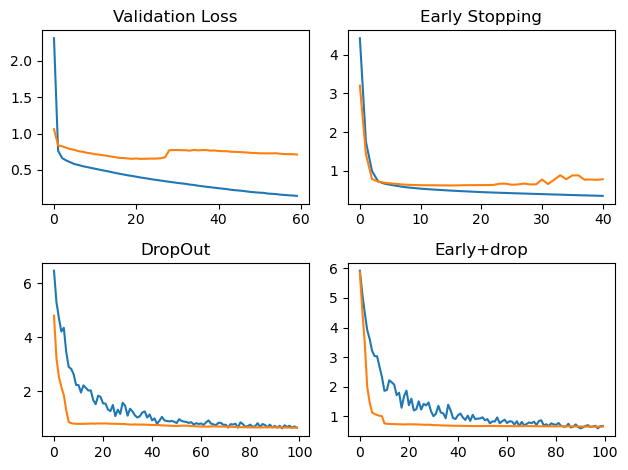

In [29]:
plt.subplot(2,2,1)
plt.plot(val_loss)
plt.title('Validation Loss')

plt.subplot(2,2,2)
plt.plot(early_loss)
plt.title('Early Stopping')

plt.subplot(2,2,3)
plt.plot(drop_loss)
plt.title('DropOut')

plt.subplot(2,2,4)
plt.plot(de_loss)
plt.title('Early+drop')

plt.tight_layout()